In [1]:
%matplotlib inline
import geopandas

import sys
sys.path.insert(0, "../")
from weavingspace.weave_unit import WeaveUnit
from weavingspace.tile_unit import TileUnit
from weavingspace.tile_map import Tiling

In [2]:
us = geopandas.read_file("data/states.gpkg")
us = us[us.state != "DC"]
us['Democrat'] = us.dem / us.votes * 100
us['Republican'] = us.gop / us.votes * 100
us['Green'] = us.grn / us.votes * 100
us['Libertarian'] = us.lib / us.votes * 100

In [3]:
# us["FID"] = list(range(us.shape[0]))

In [4]:
w3 = WeaveUnit(spacing = 15000, aspect = 1, weave_type = "basket", n = 3, 
               strands = "aab|ccd", crs = us.crs)
# w3 = TileUnit(spacing = 72000, tiling_type = "hex-colouring", n = 4, 
#               crs = us.crs)

w3 = w3.inset_tiles(750)

<Axes: >

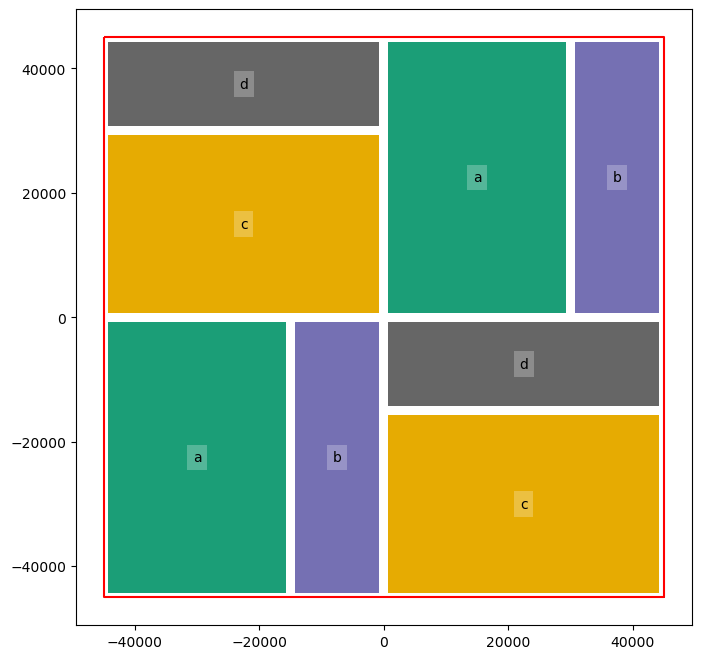

In [5]:
w3.plot(show_ids = True)

In [6]:
tiling = Tiling(w3, us)

/opt/miniconda3/envs/weaving/lib/python3.13/site-packages/shapely/constructive.py:996: RuntimeWarning: divide by zero encountered in oriented_envelope
  return lib.oriented_envelope(geometry, **kwargs)


In [7]:
election_map = tiling.get_tiled_map(rotation = -75)

In [8]:
election_map.variables = dict(zip(list("abcd"), 
                                  ["Democrat", "Green", "Republican", "Libertarian"]))
election_map.colourmaps = dict(zip(election_map.variables.values(),
                                   ("Blues", "Greens", "Reds", "Purples")))

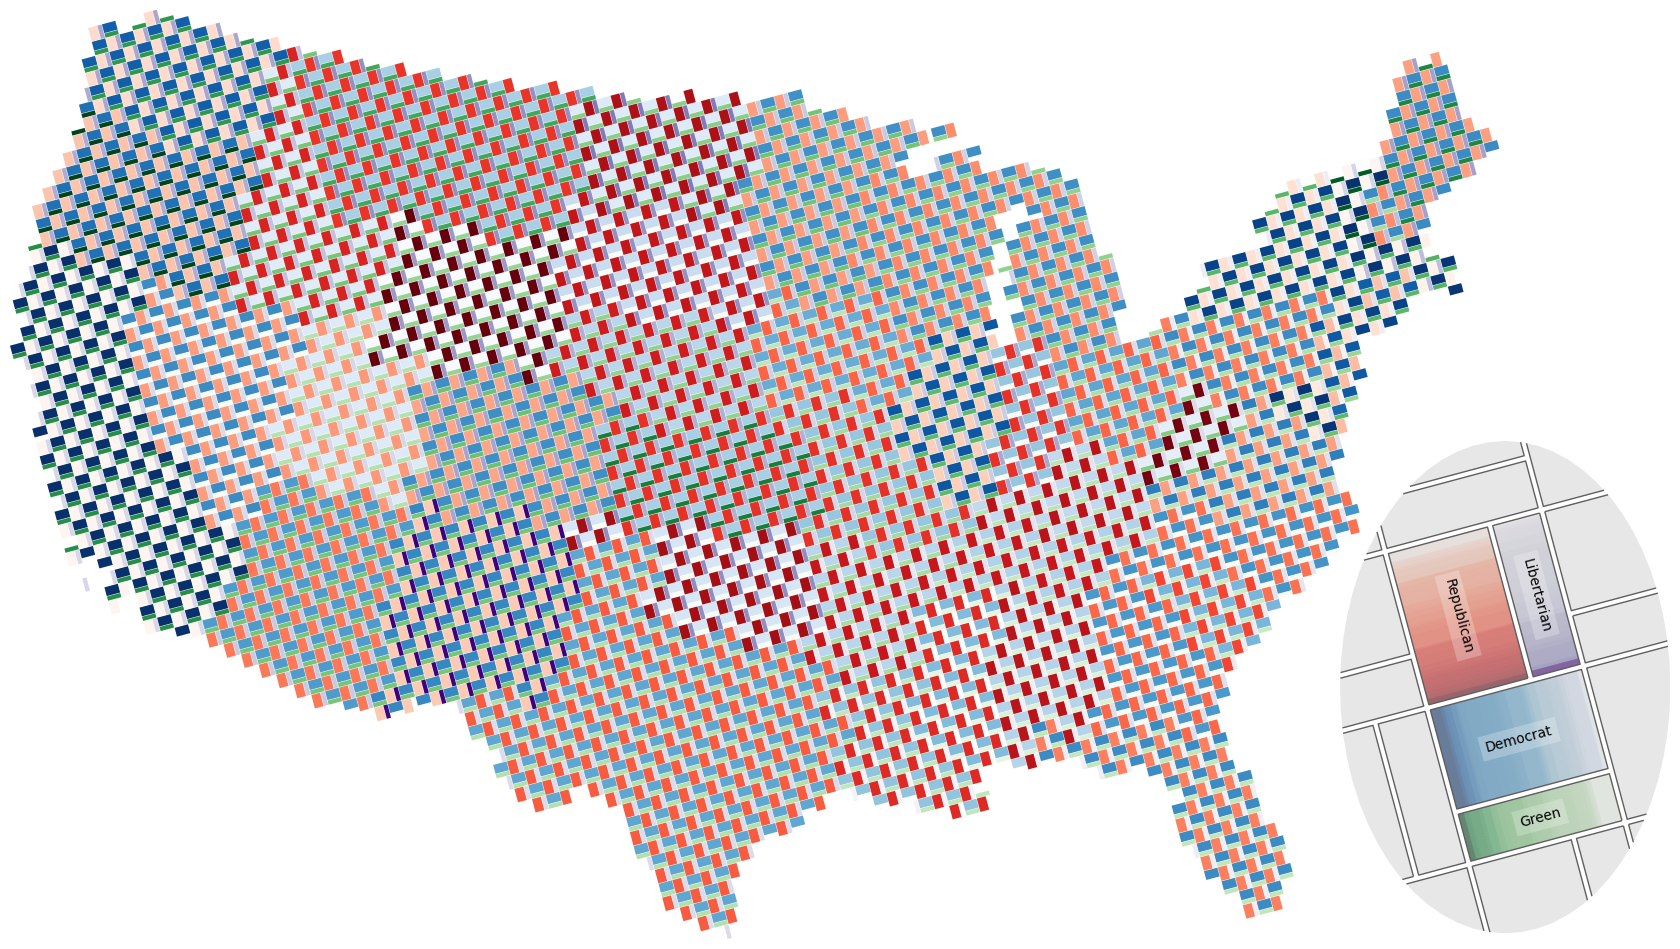

In [9]:
fig = election_map.render(legend = True, dpi = 90, k = 100, use_ellipse = True,
                          legend_dx = -0.125, legend_dy = -0.475)
# fig.savefig("NZCS-Aug-2022/slides/images/election-2016-weave.png", dpi = 90)